# Exploratory Data Analysis of Crash Dataset

In [1]:
import pandas as pd
import numpy as np
import klib
import pandas_profiling as pp
import sweetviz
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from platform import python_version

%precision 2

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 120
pd.options.display.float_format='{:,.2f}'.format
pd.options.display.precision = 2

np.set_printoptions(precision=4, linewidth=120, suppress=True, edgeitems=5)

sns.set_style("white")

print('python',python_version())
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(klib.__name__, klib.__version__)
#print(pp.__name__, pp.__version__)
print(sklearn.__name__, sklearn.__version__)
print(sweetviz.__name__, sweetviz.__version__)

python 3.9.12
numpy 1.21.5
pandas 1.5.1
klib 1.0.7
sklearn 1.0.2
sweetviz 2.1.4


C:\Users\matth\AppData\Local\Temp\ipykernel_21600\4049794000.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
df = pd.read_csv("merged_final.csv")
df.head()

C:\Users\matth\AppData\Local\Temp\ipykernel_21600\1255561079.py:1: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_final.csv")


,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,WORK_ZONE_TYPE,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,RD_NO_y,CRASH_DATE_y,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,OCCUPANT_CNT,FIRST_CONTACT_POINT,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,PERSON_TYPE,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,ADDRESS,FIRST APPROACH,SECOND APPROACH,GO-LIVE DATE,speed_camera_latitude,speed_camera_longitude,speed_camera_location
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.00,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.00,NaN,"REPORTED, NOT EVIDENT",1.00,2.00,14,2,3,41.88,-87.64,POINT (-87.64120093714 41.884547224337),JC199149,03/25/2019 02:43:00 PM,1,DRIVER,1.00,CHEVROLET,CRUZE,IL,"2,017.00",NONE,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,2.00,FRONT-LEFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASSENGER,03/25/2019 02:43:00 PM,4.00,NaN,NaN,NaN,F,27.00,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,536.00,EB,WB,12/06/2013,41.79,-87.61,"(41.793492645896656, -87.6118759701359)"
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.00,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.00,NaN,"REPORTED, NOT EVIDENT",1.00,2.00,14,2,3,41.88,-87.64,POINT (-87.64120093714 41.884547224337),JC199149,03/25/2019 02:43:00 PM,1,DRIVER,1.00,CHEVROLET,CRUZE,IL,"2,017.00",NONE,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,2.00,FRONT-LEFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,03/25/2019 02:43:00 PM,NaN,PARK FOREST,IL,60466,F,22.00,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,536.00,EB,WB,12/06/2013,41.79,-87.61,"(41.793492645896656, -87.6118759701359)"
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.00,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.00,NaN,"REPORTED, NOT EVIDENT",1.00,2.00,14,2,3,41.88,-87.64,POINT (-87.64120093714 41.884547224337),JC199149,03/25/2019 02:43:00 PM,1,DRIVER,1.00,CHEVROLET,CRUZE,IL,"2,017.00",NONE,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,2.00,FRONT-LEFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,03/25/2019 02:43:00 PM,NaN,CHICAGO,IL,60613,M,56.00,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,536.00,EB,WB,12/06/2013,41.79,-87.61,"(41.793492645896656, -87.6118759701359)"
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.

In [3]:
df.shape

(87714, 86)

In [4]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87714 entries, 0 to 87713
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CRASH_RECORD_ID          87714 non-null  object 
 1   RD_NO_x                  87317 non-null  object 
 2   CRASH_DATE_x             87714 non-null  object 
 3   POSTED_SPEED_LIMIT       87714 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE   87714 non-null  object 
 5   DEVICE_CONDITION         87714 non-null  object 
 6   WEATHER_CONDITION        87714 non-null  object 
 7   LIGHTING_CONDITION       87714 non-null  object 
 8   FIRST_CRASH_TYPE         87714 non-null  object 
 9   TRAFFICWAY_TYPE          87714 non-null  object 
 10  LANE_CNT                 23792 non-null  float64
 11  ALIGNMENT                87714 non-null  object 
 12  ROADWAY_SURFACE_COND     87714 non-null  object 
 13  ROAD_DEFECT              87714 non-null  object 
 14  REPORT_TYPE           

In [5]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called "df"
# Create new columns for crash date, crash month, crash year, crash time, and crash hour
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE_x']).dt.date
df['CRASH_MONTH'] = pd.to_datetime(df['CRASH_DATE_x']).dt.month
df['CRASH_YEAR'] = pd.to_datetime(df['CRASH_DATE_x']).dt.year
df['CRASH_TIME'] = pd.to_datetime(df['CRASH_DATE_x']).dt.time
df['CRASH_HOUR'] = pd.to_datetime(df['CRASH_DATE_x']).dt.hour

# Print the updated DataFrame
print(df[['CRASH_DATE_x', 'CRASH_DATE', 'CRASH_MONTH', 'CRASH_YEAR', 'CRASH_TIME', 'CRASH_HOUR']])


                 CRASH_DATE_x  CRASH_DATE  CRASH_MONTH  CRASH_YEAR CRASH_TIME  CRASH_HOUR
0      03/25/2019 02:43:00 PM  2019-03-25            3        2019   14:43:00          14
1      03/25/2019 02:43:00 PM  2019-03-25            3        2019   14:43:00          14
2      03/25/2019 02:43:00 PM  2019-03-25            3        2019   14:43:00          14
3      03/25/2019 02:43:00 PM  2019-03-25            3        2019   14:43:00          14
4      03/25/2019 02:43:00 PM  2019-03-25            3        2019   14:43:00          14
...                       ...         ...          ...         ...        ...         ...
87709  01/29/2022 08:00:00 AM  2022-01-29            1        2022   08:00:00           8
87710  01/29/2022 08:00:00 AM  2022-01-29            1        2022   08:00:00           8
87711  01/29/2022 08:00:00 AM  2022-01-29            1        2022   08:00:00           8
87712  01/29/2022 08:00:00 AM  2022-01-29            1        2022   08:00:00           8
87713  01/

In [6]:
df.shape

(87714, 88)

# Data Understanding

In [7]:
# Display the number of crashes per year in the data set.
df.groupby(df['CRASH_YEAR'])['CRASH_RECORD_ID'].nunique().reset_index(name='COUNT OF CRASHES')

,CRASH_YEAR,COUNT OF CRASHES
0,2015,236
1,2016,1132
2,2017,2187
3,2018,3097
4,2019,3061
5,2020,2381
6,2021,2892
7,2022,2973
8,2023,1499


In [8]:
df.shape

(87714, 88)

In [9]:
df.head(10)

,CRASH_RECORD_ID,RD_NO_x,CRASH_DATE_x,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,WORK_ZONE_TYPE,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,RD_NO_y,CRASH_DATE_y,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,MAKE,MODEL,LIC_PLATE_STATE,VEHICLE_YEAR,VEHICLE_DEFECT,VEHICLE_TYPE,VEHICLE_USE,TRAVEL_DIRECTION,MANEUVER,TOWED_I,OCCUPANT_CNT,FIRST_CONTACT_POINT,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS,PERSON_TYPE,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,AGE,DRIVERS_LICENSE_STATE,DRIVERS_LICENSE_CLASS,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,ADDRESS,FIRST APPROACH,SECOND APPROACH,GO-LIVE DATE,speed_camera_latitude,speed_camera_longitude,speed_camera_location,CRASH_YEAR,CRASH_TIME
0,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.00,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.00,NaN,"REPORTED, NOT EVIDENT",1.00,2.00,14,2,3,41.88,-87.64,POINT (-87.64120093714 41.884547224337),JC199149,03/25/2019 02:43:00 PM,1,DRIVER,1.00,CHEVROLET,CRUZE,IL,"2,017.00",NONE,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,2.00,FRONT-LEFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PASSENGER,2019-03-25,4.00,NaN,NaN,NaN,F,27.00,NaN,NaN,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NaN,NaN,NaN,536.00,EB,WB,12/06/2013,41.79,-87.61,"(41.793492645896656, -87.6118759701359)",2019,14:43:00
1,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.00,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.00,NaN,"REPORTED, NOT EVIDENT",1.00,2.00,14,2,3,41.88,-87.64,POINT (-87.64120093714 41.884547224337),JC199149,03/25/2019 02:43:00 PM,1,DRIVER,1.00,CHEVROLET,CRUZE,IL,"2,017.00",NONE,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,2.00,FRONT-LEFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,2019-03-25,NaN,PARK FOREST,IL,60466,F,22.00,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,"REPORTED, NOT EVIDENT",IMPROPER TURN,UNKNOWN,NORMAL,536.00,EB,WB,12/06/2013,41.79,-87.61,"(41.793492645896656, -87.6118759701359)",2019,14:43:00
2,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,4.00,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,Y,NaN,NaN,"OVER $1,500",03/25/2019 03:17:00 PM,IMPROPER TURNING/NO SIGNAL,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,536,W,RANDOLPH ST,121.00,NaN,"REPORTED, NOT EVIDENT",1.00,2.00,14,2,3,41.88,-87.64,POINT (-87.64120093714 41.884547224337),JC199149,03/25/2019 02:43:00 PM,1,DRIVER,1.00,CHEVROLET,CRUZE,IL,"2,017.00",NONE,PASSENGER,RIDESHARE SERVICE,W,TURNING LEFT,Y,2.00,FRONT-LEFT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DRIVER,2019-03-25,NaN,CHICAGO,IL,60613,M,56.00,IL,D,SAFETY BELT USED,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NONE,NOT OBSCURED,NORMAL,536.00,EB,WB,12/06/2013,41.79,-87.61,"(41.793492645896656, -87.6118759701359)",2019,14:43:00
3,79c7a2ce89f446262efd86df3d72d18b04ba487024b7c4...,JC199149,03/25/2019 02:43:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR

In [10]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,INJURIES_TOTAL,INJURIES_NO_INDICATION,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,UNIT_NO,NUM_PASSENGERS,VEHICLE_YEAR,OCCUPANT_CNT,TOTAL_VEHICLE_LENGTH,AXLE_CNT,SEAT_NO,AGE,ADDRESS,speed_camera_latitude,speed_camera_longitude,CRASH_YEAR
count,"87,714.00","23,792.00","87,714.00","87,714.00","87,714.00","87,714.00","87,714.00","87,714.00","87,714.00","87,172.00","87,172.00","87,714.00","21,562.00","73,814.00","85,563.00",177.00,266.00,"17,647.00","61,817.00","87,714.00","87,714.00","87,714.00","87,714.00"
mean,28.91,2.67,"2,893.31","1,318.58",0.27,2.60,13.41,4.15,6.54,41.87,-87.69,1.59,1.78,"2,012.56",1.35,47.56,3.36,4.08,37.60,"2,893.31",41.46,-87.28,"2,019.58"
std,5.66,3.03,"1,725.33",672.33,0.73,1.94,5.40,1.98,3.39,0.07,0.05,0.65,2.03,102.44,1.32,19.47,1.42,2.14,16.86,"1,725.33",7.25,7.25,2.07
min,0.00,0.00,115.00,111.00,0.00,0.00,0.00,1.00,1.00,41.65,-87.85,0.00,1.00,"1,900.00",0.00,1.00,1.00,1.00,-49.00,115.00,-87.75,-87.83,"2,015.00"
25%,30.00,2.00,"1,334.00",911.00,0.00,2.00,10.00,2.00,4.00,41.84,-87.72,1.00,1.00,"2,007.00",1.00,34.00,2.00,3.00,25.00,"1,334.00",41.79,-87.72,"2,018.00"
50%,30.00,2.00,"3,100.00","1,222.00",0.00,2.00,14.00,4.00,7.00,41.88,-87.69,2.00,1.00,"2,012.00",1.00,50.00,3.00,3.00,35.00,"3,100.00",41.89,-87.70,"2,019.00"
75%,30.00,4.00,"3,655.00","1,831.00",0.00,3.00,17.00,6.00,9.00,41.93,-87.64,2.00,2.00,"2,016.00",1.00,63.00,5.00,5.00,49.00,"3,655.00",41.92,-87.66,"2,021.00"
max,99.00,99.00,"11,153.00","2,535.00",8.00,31.00,23.00,7.00,12.00,42.02,-87.53,8.00,29.00,"9,999.00",30.00,80.00,8.00,12.00,107.00,"11,153.00",42.01,41.97,"2,023.00"


In [11]:
# Review columns with null values.
pd.options.display.max_rows = 150
df.isna().sum().sort_values(ascending=False)

HAZMAT_CLASS               87654
TOTAL_VEHICLE_LENGTH       87537
AXLE_CNT                   87448
WORK_ZONE_TYPE             87263
HAZMAT_OUT_OF_SERVICE_I    86969
MCS_OUT_OF_SERVICE_I       86954
LOAD_TYPE                  86937
CARGO_BODY_TYPE            86889
VEHICLE_CONFIG             86835
NOT_RIGHT_OF_WAY_I         84854
TOWED_I                    76275
SEAT_NO                    70067
INTERSECTION_RELATED_I     66288
NUM_PASSENGERS             66152
LANE_CNT                   63922
HIT_AND_RUN_I              63903
DRIVERS_LICENSE_CLASS      44314
SECOND APPROACH            36974
DRIVERS_LICENSE_STATE      36680
ZIPCODE                    28951
AGE                        25897
CITY                       23782
STATE                      22820
DRIVER_VISION              17855
DRIVER_ACTION              17816
PHYSICAL_CONDITION         17777
VEHICLE_YEAR               13900
LIC_PLATE_STATE             8543
REPORT_TYPE                 3276
FIRST_CONTACT_POINT         2305
MODEL     

In [12]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO_x', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME',
       'BEAT_OF_OCCURRENCE', 'WORK_ZONE_TYPE', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_NO_INDICATION',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'RD_NO_y',
       'CRASH_DATE_y', 'UNIT_NO', 'UNIT_TYPE', 'NUM_PASSENGERS', 'MAKE', 'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POIN

In [13]:
# Display the number of crashes represented in the dataset.
df['CRASH_RECORD_ID'].nunique()

19458

# Data Exploration

## Number of Crashes from 2015 to 2023, Monthly Cumulative, Weekly Cumulative, Hourly Cumulative

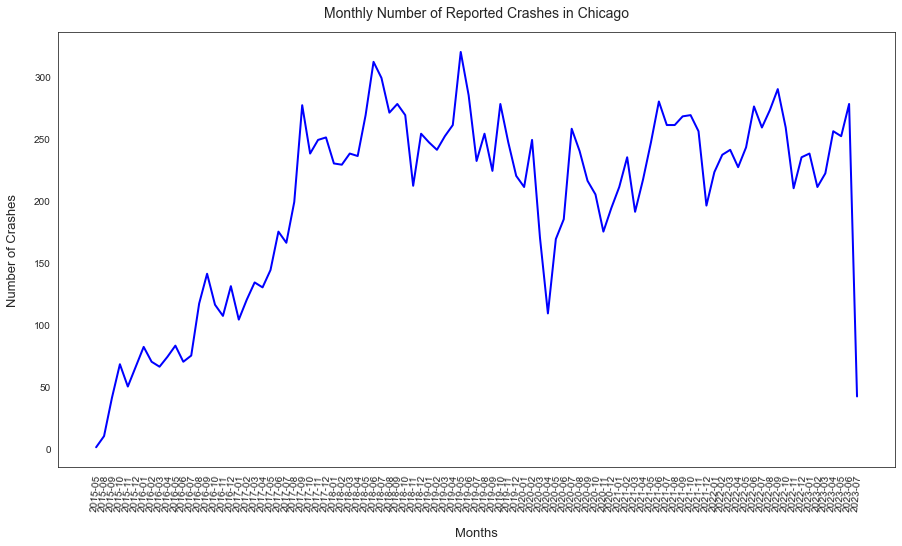

In [14]:
# Convert 'CRASH_DATE' column to datetime format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

# Plot monthly number of reported crashes
plt.figure(figsize=(15, 8))
s = sns.lineplot(data=df.groupby(df['CRASH_DATE'].dt.strftime('%Y-%m'))['CRASH_RECORD_ID'].nunique(), color='b', linewidth=2)
s.set_title('Monthly Number of Reported Crashes in Chicago', y=1.02, fontsize=14)
s.set_xlabel('Months', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)

for item in s.get_xticklabels():
    item.set_rotation(85)


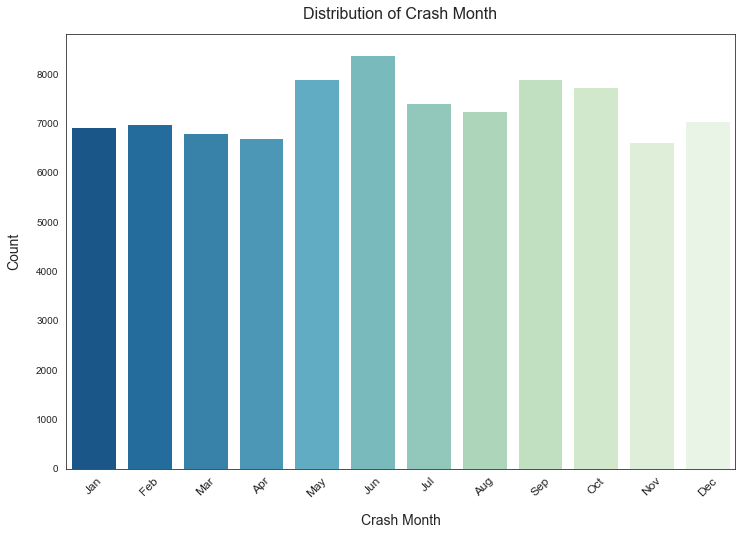

In [15]:
# Distribution of crash month
plt.figure(figsize=(12, 8))  # Increase the figure size
sns.countplot(data=df, x='CRASH_MONTH', palette='GnBu_r', order=range(1, 13))  # Add the 'order' parameter
plt.title('Distribution of Crash Month', fontsize=16, y=1.02)  # Increase the title font size
plt.xlabel('Crash Month', fontsize=14, labelpad=15)  # Increase the x-label font size
plt.ylabel('Count', fontsize=14, labelpad=15)  # Increase the y-label font size
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12, rotation=45)  # Increase the x-ticks font size and add rotation
plt.show()


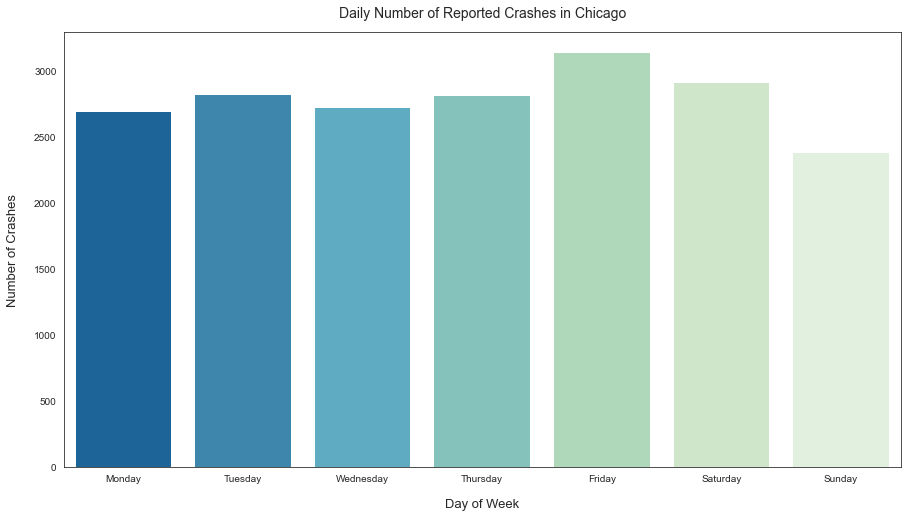

In [16]:
# Add column containing day of week that crash occured.
df['Day'] = df['CRASH_DATE'].dt.dayofweek

# Plot number of crashes by day of week.
plt.figure(figsize=(15,8))
s = sns.barplot(data=df.groupby('Day')['CRASH_RECORD_ID'].nunique().reset_index(), x='Day', y='CRASH_RECORD_ID', palette='GnBu_r', linewidth=0)
s.set_title('Daily Number of Reported Crashes in Chicago', y=1.02, fontsize=14)
s.set_xlabel('Day of Week', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

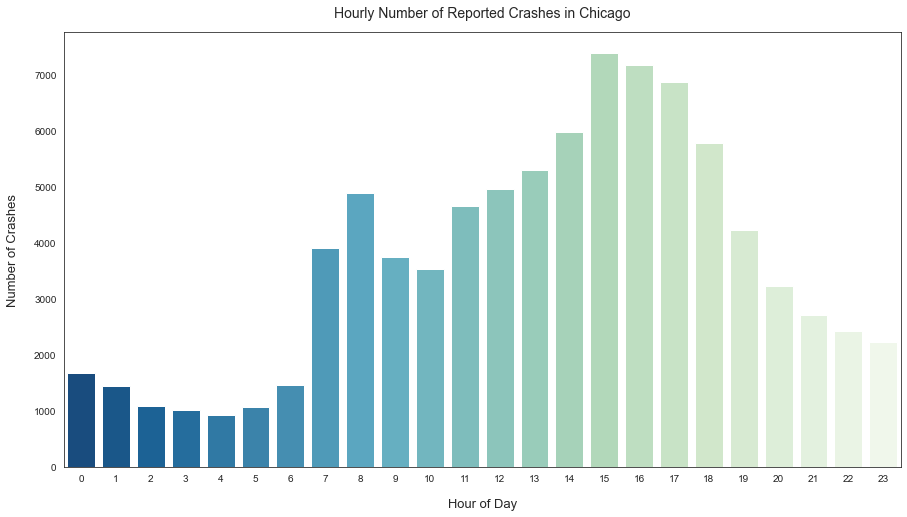

In [17]:
# Add column containing hour of day that crash occurred
df['Hour'] = df['CRASH_HOUR']

# Plot number of crashes by hour of day
plt.figure(figsize=(15,8))
s = sns.countplot(data=df, x='Hour', palette='GnBu_r')
s.set_title('Hourly Number of Reported Crashes in Chicago', y=1.02, fontsize=14)
s.set_xlabel('Hour of Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.xticks(np.arange(0, 24))
plt.show()


## Trend of Crash Types over Time from 2015 to 2023

In [18]:
# Group by crash type and count the number of crashes in each group.
df_types = df.groupby([df['CRASH_DATE'].dt.strftime('%Y-%m'), 'FIRST_CRASH_TYPE'])['CRASH_RECORD_ID'].nunique().reset_index(name='COUNT')

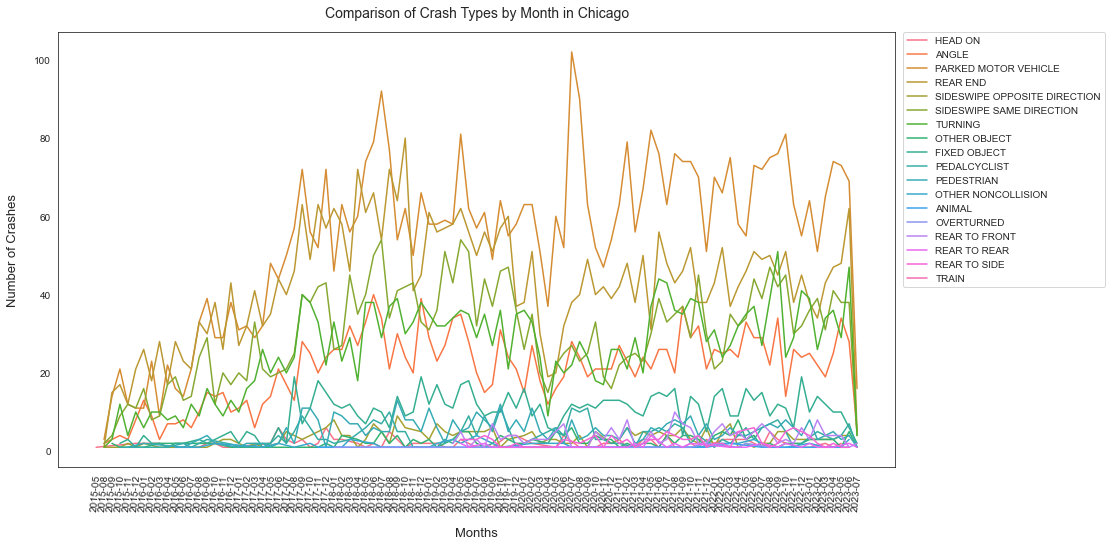

In [19]:
# Display a plot comparing the number of crashes per month by type.
plt.figure(figsize=(15,8))
s = sns.lineplot(data=df_types, x='CRASH_DATE', y='COUNT', hue='FIRST_CRASH_TYPE')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
s.set_title('Comparison of Crash Types by Month in Chicago', y=1.02, fontsize=14)
s.set_xlabel('Months', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)

for item in s.get_xticklabels():
    item.set_rotation(85)
    
plt.show()

## Weather Conditions and Car Crash

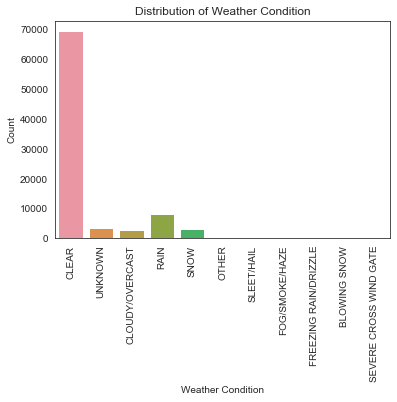

In [20]:
# Distribution of weather condition
sns.countplot(data=df, x='WEATHER_CONDITION')
plt.title('Distribution of Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

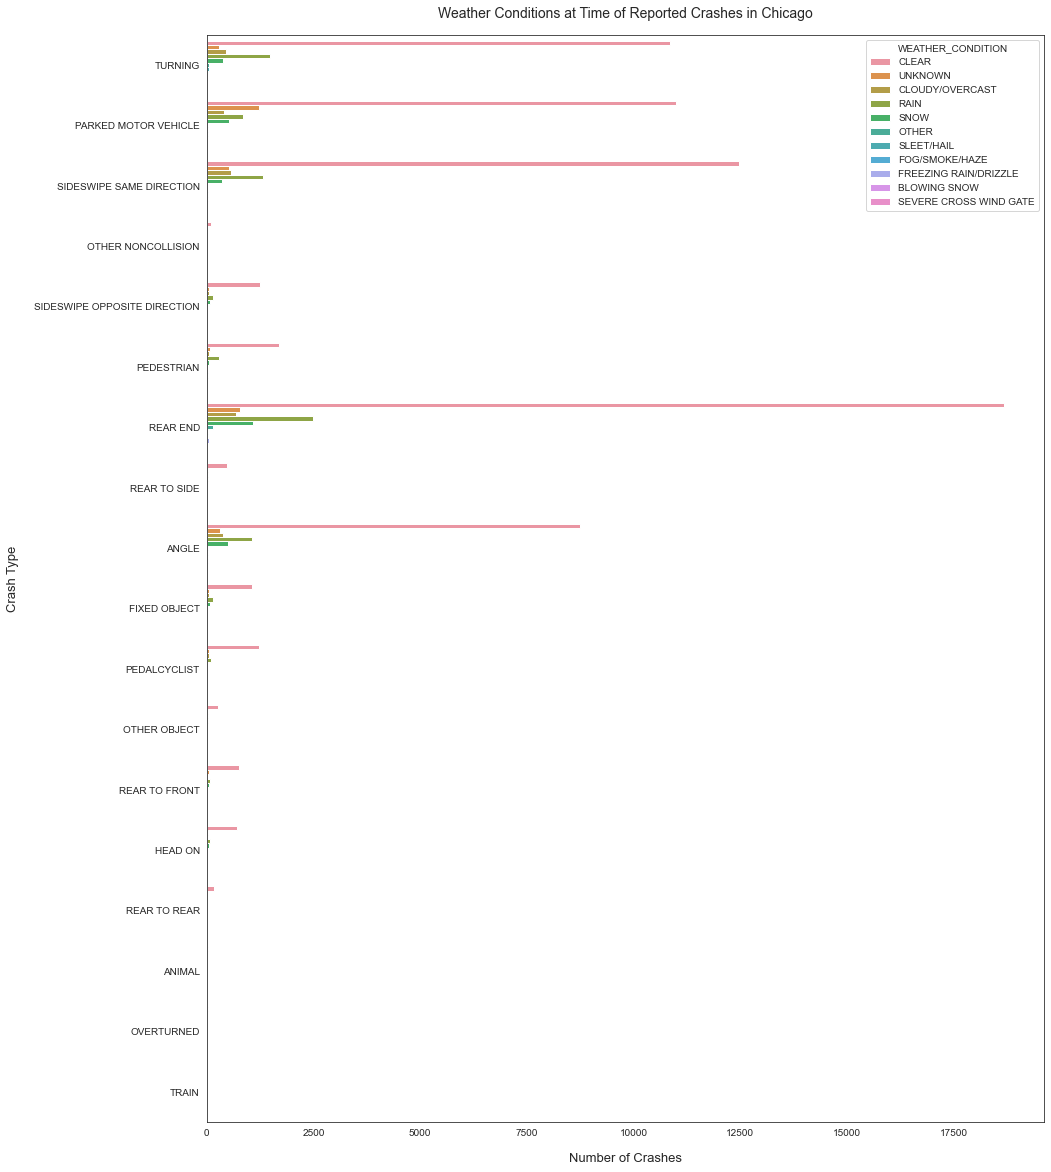

In [21]:
plt.figure(figsize=(15, 20))
sns.countplot(data=df, hue='WEATHER_CONDITION', y='FIRST_CRASH_TYPE')
plt.title('Weather Conditions at Time of Reported Crashes in Chicago', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Crash Type', fontsize=13, labelpad=15)
plt.show();

## Road Conditions

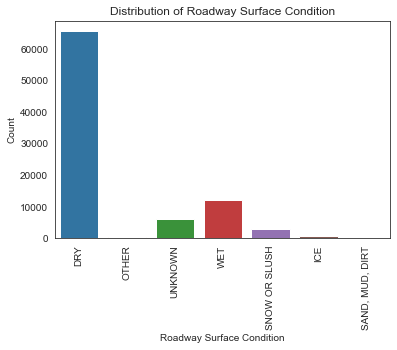

In [22]:
# Distribution of roadway surface condition
sns.countplot(data=df, x='ROADWAY_SURFACE_COND')
plt.title('Distribution of Roadway Surface Condition')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Lighting Conditions

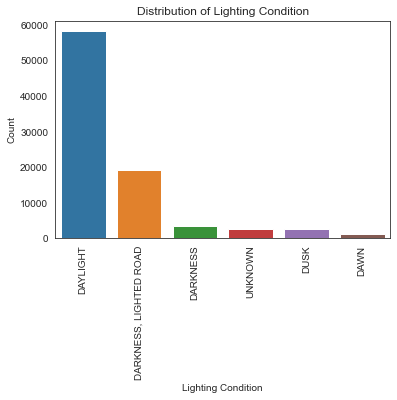

In [23]:
# Distribution of lighting condition
sns.countplot(data=df, x='LIGHTING_CONDITION')
plt.title('Distribution of Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Primary Causes of Crashes

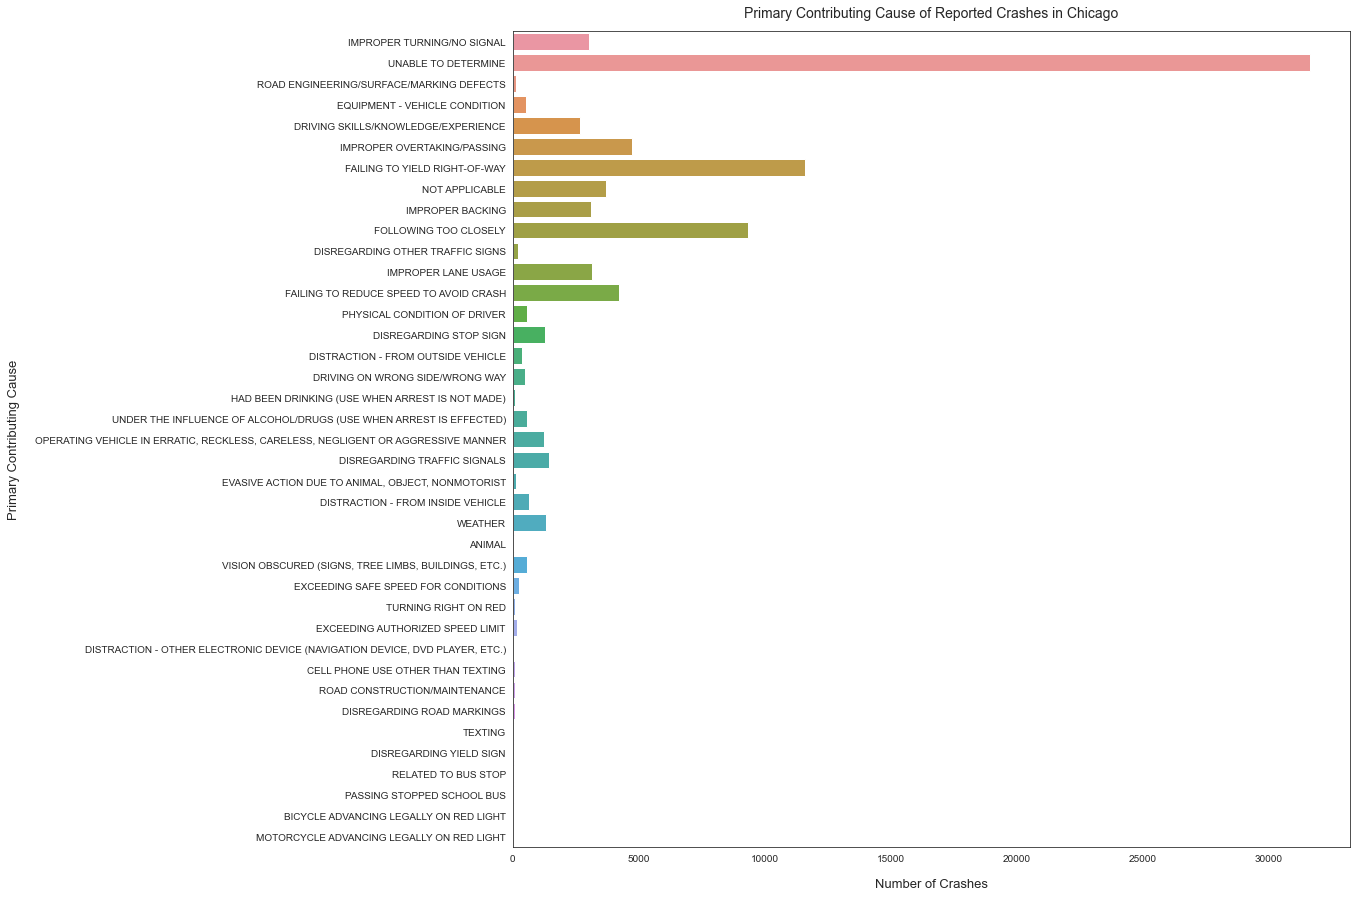

In [24]:
# Display a plot showing the primary contributing cause of reported crashes.
plt.figure(figsize=(15, 15))
sns.countplot(data=df,  y='PRIM_CONTRIBUTORY_CAUSE')
plt.title('Primary Contributing Cause of Reported Crashes in Chicago', y=1.01, fontsize=14)
plt.xlabel('Number of Crashes', fontsize=13, labelpad=15)
plt.ylabel('Primary Contributing Cause', fontsize=13, labelpad=15)
plt.show();

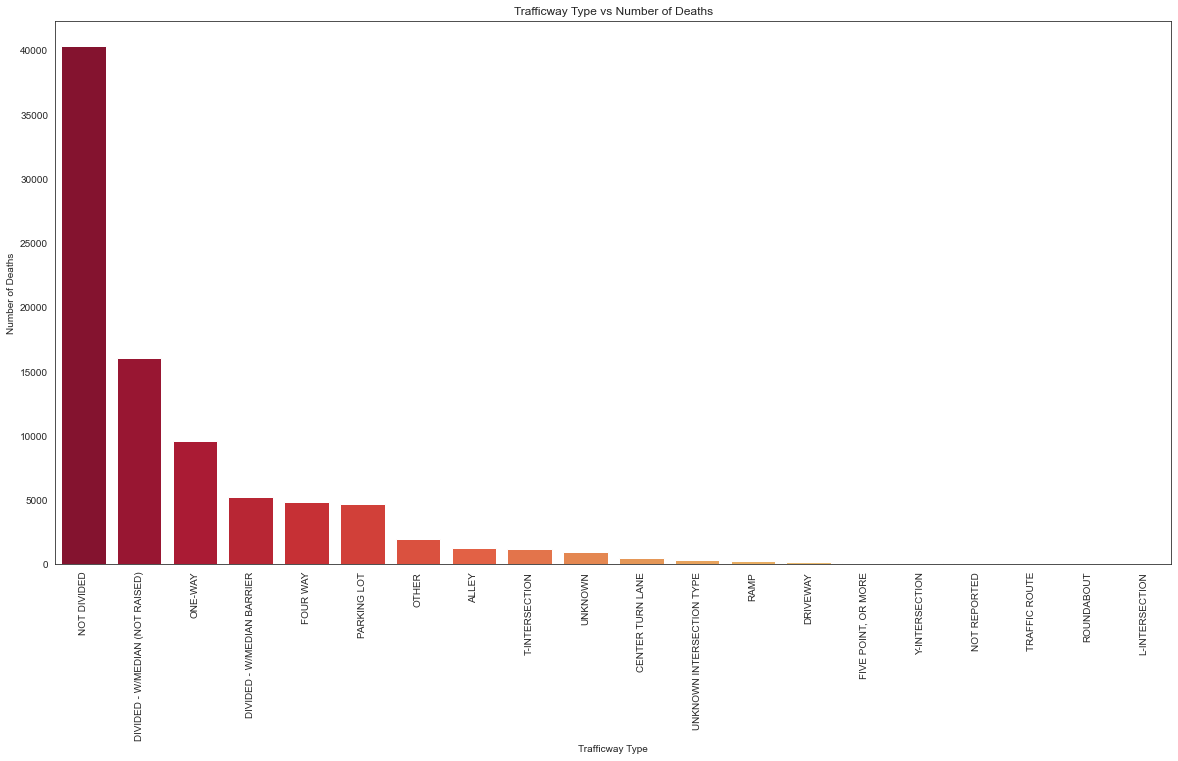

In [25]:
plt.figure(figsize =(20,10))
plt.xticks(rotation=90)

ax = sns.countplot(x="TRAFFICWAY_TYPE", data=df,order = df['TRAFFICWAY_TYPE'].value_counts().index, palette = 'YlOrRd_r')
plt.xlabel('Trafficway Type')
plt.ylabel('Number of Deaths')
plt.title('Trafficway Type vs Number of Deaths')
plt.show()

## Number of Injuries per Crash Distribution

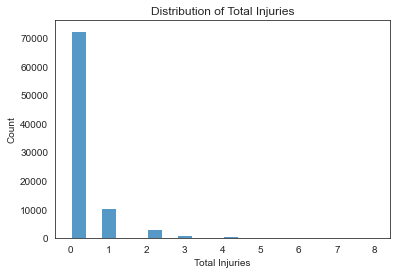

In [26]:
# Data distribution of injuries
sns.histplot(data=df, x='INJURIES_TOTAL', bins=20)
plt.title('Distribution of Total Injuries')
plt.xlabel('Total Injuries')
plt.ylabel('Count')
plt.show()


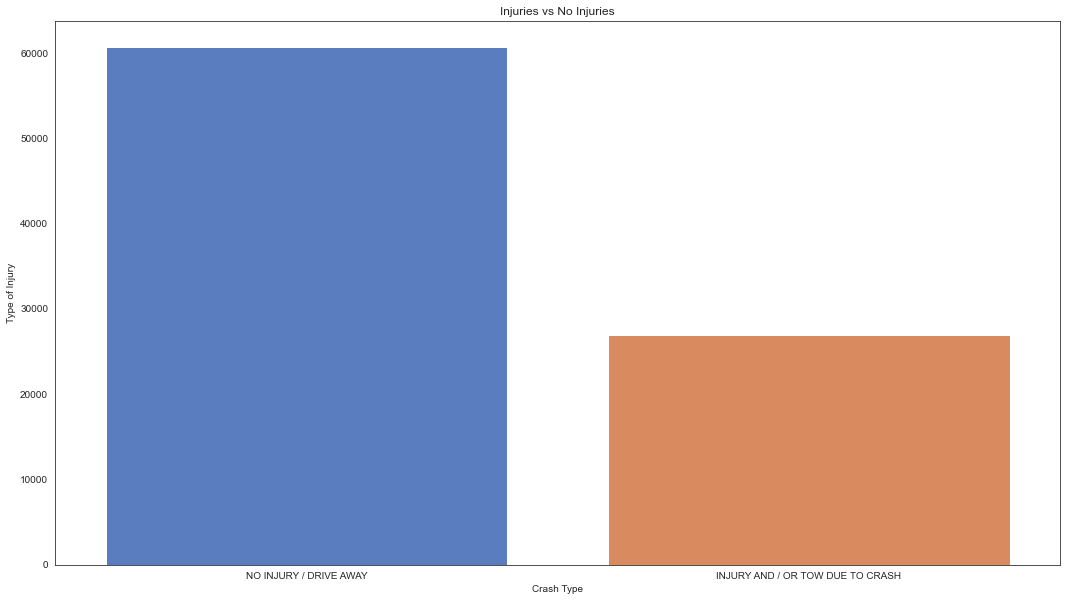

In [27]:
plt.figure(figsize =(18,10))
plt.xticks()

ax = sns.countplot(x = df['CRASH_TYPE'], data = df, order = df['CRASH_TYPE'].value_counts().index, palette = 'muted')
plt.xlabel('Crash Type')
plt.ylabel('Type of Injury')
plt.title('Injuries vs No Injuries')
plt.show()

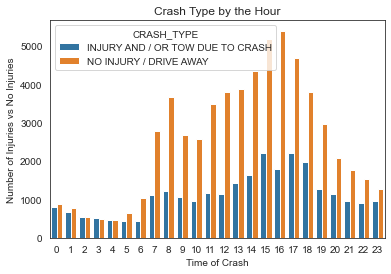

In [28]:
ax = sns.countplot(x= "CRASH_HOUR", hue = 'CRASH_TYPE', data = df)
plt.xlabel('Time of Crash')
plt.ylabel('Number of Injuries vs No Injuries')
plt.title('Crash Type by the Hour')
plt.show()

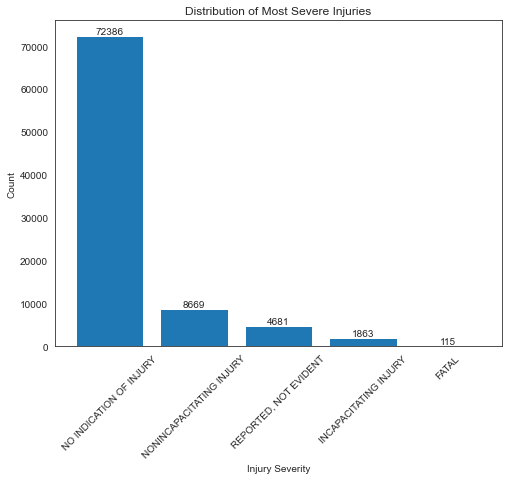

In [29]:
# Count the occurrences of each category in the column
injury_counts = df['MOST_SEVERE_INJURY'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(injury_counts.index, injury_counts.values)
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.title('Distribution of Most Severe Injuries')

# Add data labels
for i, count in enumerate(injury_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

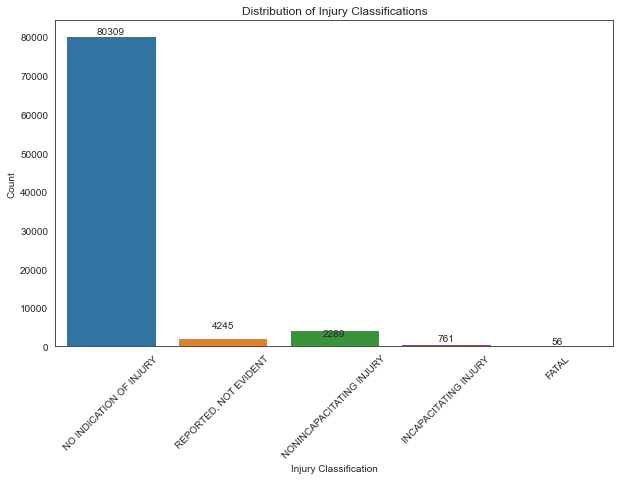

In [30]:
# Count the occurrences of each injury classification in the column
injury_classification_counts = df['INJURY_CLASSIFICATION'].value_counts()

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='INJURY_CLASSIFICATION')
plt.xlabel('Injury Classification')
plt.ylabel('Count')
plt.title('Distribution of Injury Classifications')

# Add data labels
for i, count in enumerate(injury_classification_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()


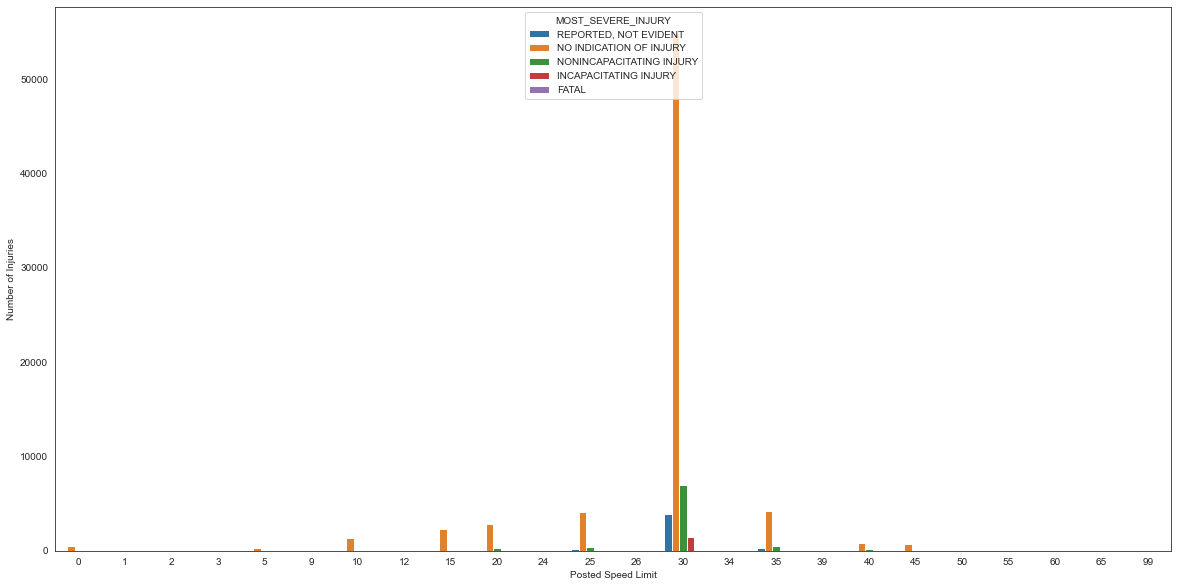

In [31]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="POSTED_SPEED_LIMIT", hue = 'MOST_SEVERE_INJURY',data= df)
plt.xlabel('Posted Speed Limit')
plt.ylabel('Number of Injuries')
plt.show()

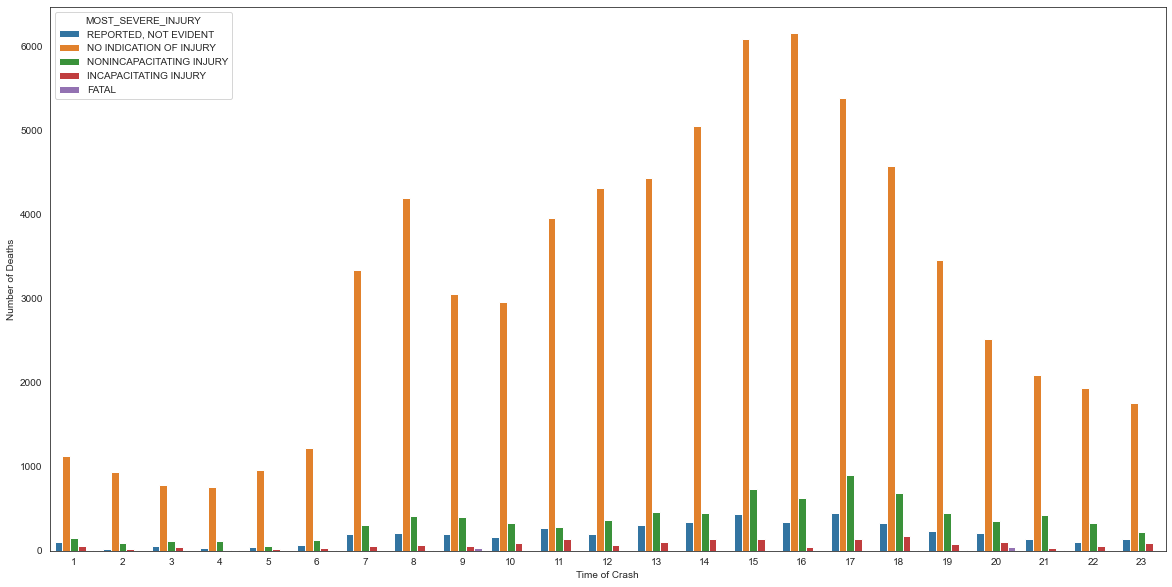

In [32]:
plt.figure(figsize =(20,10))
ax = sns.countplot(x="CRASH_HOUR", hue = 'MOST_SEVERE_INJURY',data=df,order = range(1,24))
plt.xlabel('Time of Crash')
plt.ylabel('Number of Deaths')
plt.show()

## Car Damage Distribution

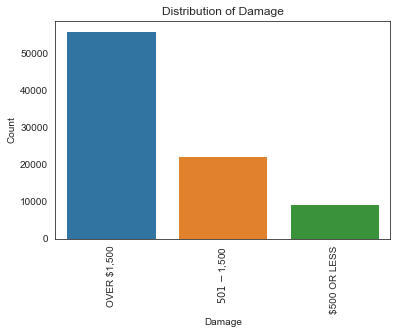

In [33]:
# Distribution of damage
sns.countplot(data=df, x='DAMAGE')
plt.title('Distribution of Damage')
plt.xlabel('Damage')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87714 entries, 0 to 87713
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CRASH_RECORD_ID          87714 non-null  object        
 1   RD_NO_x                  87317 non-null  object        
 2   CRASH_DATE_x             87714 non-null  object        
 3   POSTED_SPEED_LIMIT       87714 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE   87714 non-null  object        
 5   DEVICE_CONDITION         87714 non-null  object        
 6   WEATHER_CONDITION        87714 non-null  object        
 7   LIGHTING_CONDITION       87714 non-null  object        
 8   FIRST_CRASH_TYPE         87714 non-null  object        
 9   TRAFFICWAY_TYPE          87714 non-null  object        
 10  LANE_CNT                 23792 non-null  float64       
 11  ALIGNMENT                87714 non-null  object        
 12  ROADWAY_SURFACE_COND     87714 n

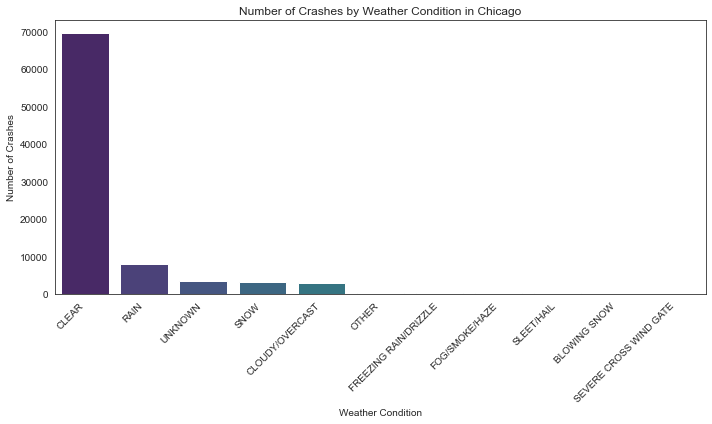

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called "df"
# Select the columns 'WEATHER_CONDITION' and 'CRASH_RECORD_ID' for the visualization
weather_crash_counts = df['WEATHER_CONDITION'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_crash_counts.index, y=weather_crash_counts.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Weather Condition in Chicago')
plt.tight_layout()
plt.show()


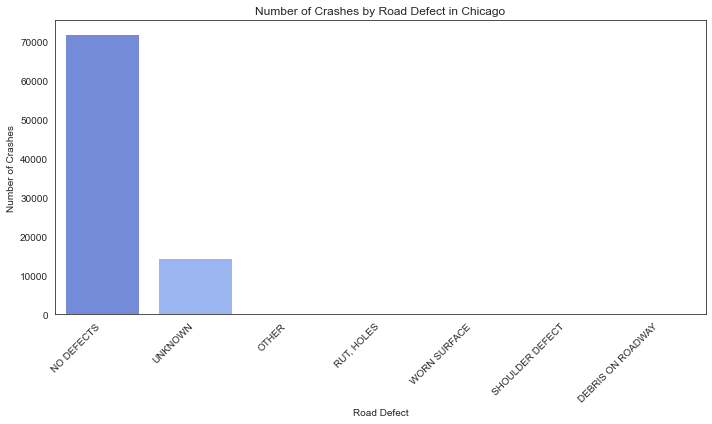

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called "df"
# Select the columns 'ROAD_DEFECT' and 'CRASH_RECORD_ID' for the visualization
road_defect_crash_counts = df['ROAD_DEFECT'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=road_defect_crash_counts.index, y=road_defect_crash_counts.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Road Defect')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Road Defect in Chicago')
plt.tight_layout()
plt.show()


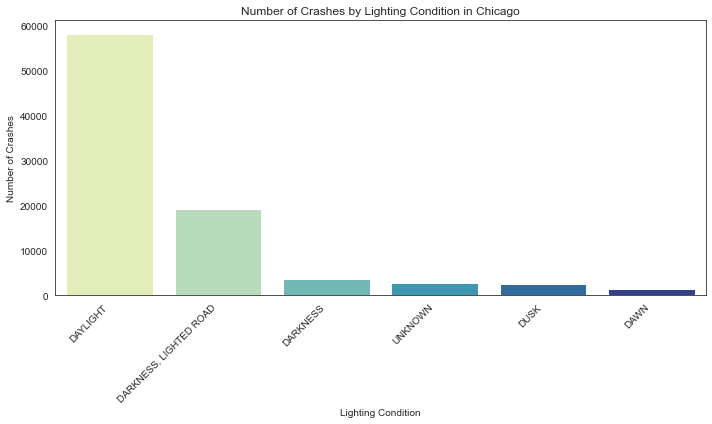

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a DataFrame called "df"
# Select the columns 'LIGHTING_CONDITION' and 'CRASH_RECORD_ID' for the visualization
lighting_condition_crash_counts = df['LIGHTING_CONDITION'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=lighting_condition_crash_counts.index, y=lighting_condition_crash_counts.values, palette='YlGnBu')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Lighting Condition')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Lighting Condition in Chicago')
plt.tight_layout()
plt.show()


## Forecasting

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\matth\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\

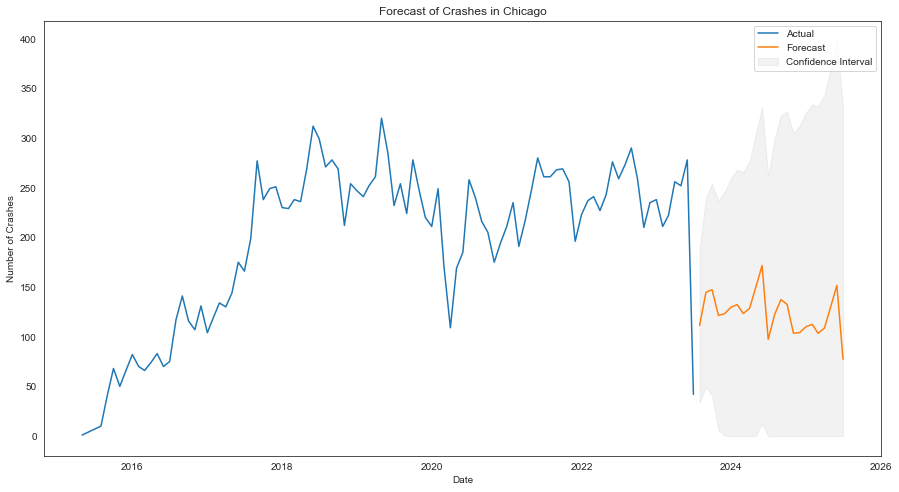

In [39]:
# Assuming your dataset is stored in a DataFrame called "df"
# Convert 'CRASH_DATE_x' column to datetime format
df['CRASH_DATE_x'] = pd.to_datetime(df['CRASH_DATE_x'])

# Group by year and month, and calculate the count of unique 'CRASH_RECORD_ID'
df_forecast = df.groupby(df['CRASH_DATE_x'].dt.to_period('M'))['CRASH_RECORD_ID'].nunique().reset_index(name='COUNT')

# Convert 'CRASH_DATE_x' column to timestamp format
df_forecast['CRASH_DATE_x'] = pd.to_datetime(df_forecast['CRASH_DATE_x'].dt.to_timestamp())

# Set 'CRASH_DATE_x' column as the index
df_forecast.set_index('CRASH_DATE_x', inplace=True)

# Create SARIMA model
order = (1, 1, 1)  # ARIMA order (p, d, q)
seasonal_order = (0, 1, 1, 12)  # Seasonal order (P, D, Q, s)
model = SARIMAX(df_forecast['COUNT'], order=order, seasonal_order=seasonal_order)

# Fit the model to the data
model_fit = model.fit()

# Forecast future values
forecast = model_fit.get_forecast(steps=24)  # Forecast for 24 months

# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_lower = np.maximum(forecast.conf_int()['lower COUNT'], 0)  # Set negative lower bound to zero
forecast_upper = forecast.conf_int()['upper COUNT']

# Apply floor value to forecasted values
forecast_values = np.maximum(forecast_values, 0)

# Create future dates for the forecast
forecast_dates = pd.date_range(start=df_forecast.index[-1], periods=24, freq='M')

# Plot the forecast
plt.figure(figsize=(15, 8))
plt.plot(df_forecast.index, df_forecast['COUNT'], label='Actual')
plt.plot(forecast_dates, forecast_values, label='Forecast')
plt.fill_between(forecast_dates, forecast_lower, forecast_upper, color='gray', alpha=0.1, label='Confidence Interval')
plt.title('Forecast of Crashes in Chicago')
plt.xlabel('Date')
plt.ylabel('Number of Crashes')
plt.legend()
plt.show()


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87714 entries, 0 to 87713
Data columns (total 90 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   CRASH_RECORD_ID          87714 non-null  object        
 1   RD_NO_x                  87317 non-null  object        
 2   CRASH_DATE_x             87714 non-null  datetime64[ns]
 3   POSTED_SPEED_LIMIT       87714 non-null  int64         
 4   TRAFFIC_CONTROL_DEVICE   87714 non-null  object        
 5   DEVICE_CONDITION         87714 non-null  object        
 6   WEATHER_CONDITION        87714 non-null  object        
 7   LIGHTING_CONDITION       87714 non-null  object        
 8   FIRST_CRASH_TYPE         87714 non-null  object        
 9   TRAFFICWAY_TYPE          87714 non-null  object        
 10  LANE_CNT                 23792 non-null  float64       
 11  ALIGNMENT                87714 non-null  object        
 12  ROADWAY_SURFACE_COND     87714 n

In [41]:
lists = ['CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT',
       'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'WORK_ZONE_TYPE', 'MOST_SEVERE_INJURY','DAMAGE',
       'INJURIES_TOTAL','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE',
       'LONGITUDE', 'CRASH_YEAR'
            ]
count = 0

for i in lists:
    count += 1
    
print(count)

27


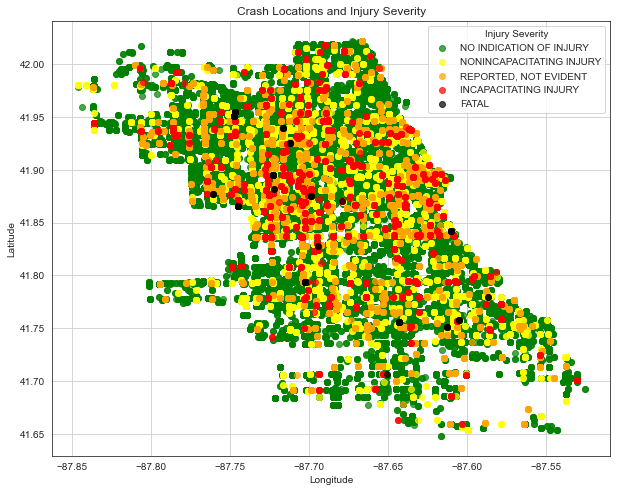

In [42]:
import matplotlib.pyplot as plt

# Define the colors or markers for different injury severity levels
injury_colors = {
    'NO INDICATION OF INJURY': 'green',
    'NONINCAPACITATING INJURY': 'yellow',
    'REPORTED, NOT EVIDENT': 'orange',
    'INCAPACITATING INJURY': 'red',
    'FATAL': 'black'
}

# Plot the scatter plot
plt.figure(figsize=(10, 8))
for severity, color in injury_colors.items():
    severity_df = df[df['MOST_SEVERE_INJURY'] == severity]
    plt.scatter(severity_df['LONGITUDE'], severity_df['LATITUDE'], c=color, label=severity, alpha=0.7)

# Add legend and labels
plt.legend(title='Injury Severity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crash Locations and Injury Severity')
plt.grid(True)

# Show the plot
plt.show()


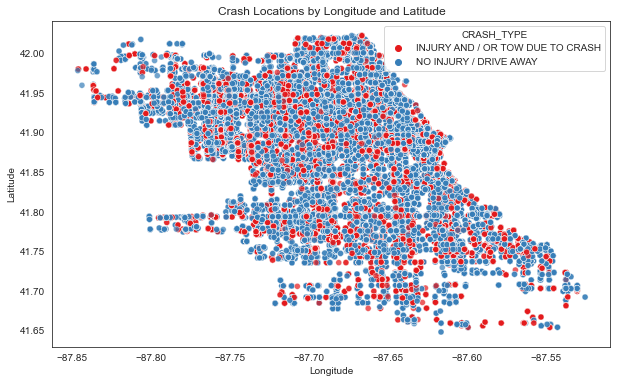

In [43]:
# Example: Scatter plot of latitude and longitude with crash severity as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='LONGITUDE', y='LATITUDE', hue='CRASH_TYPE', palette='Set1', alpha=0.7)
plt.title('Crash Locations by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\matth\AppData\Local\Temp\ipykernel_21600\2705770082.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


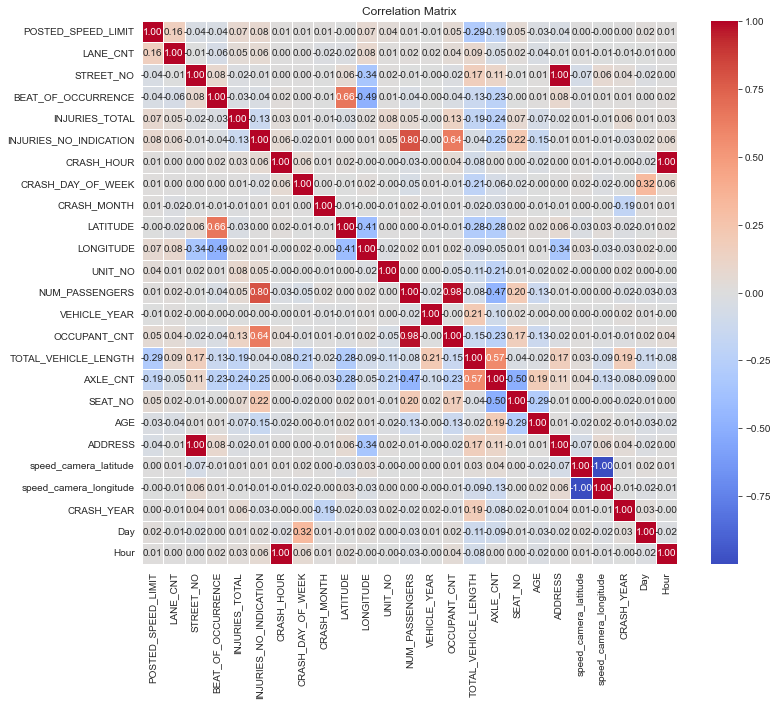

In [44]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Data Understanding


In [45]:
# Display the number of rows and columns in the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Display the data types of each column
print(df.dtypes)

# Display basic statistics of numeric columns
print(df.describe())


Number of rows: 87714
Number of columns: 90
CRASH_RECORD_ID                    object
RD_NO_x                            object
CRASH_DATE_x               datetime64[ns]
POSTED_SPEED_LIMIT                  int64
TRAFFIC_CONTROL_DEVICE             object
DEVICE_CONDITION                   object
WEATHER_CONDITION                  object
LIGHTING_CONDITION                 object
FIRST_CRASH_TYPE                   object
TRAFFICWAY_TYPE                    object
LANE_CNT                          float64
ALIGNMENT                          object
ROADWAY_SURFACE_COND               object
ROAD_DEFECT                        object
REPORT_TYPE                        object
CRASH_TYPE                         object
INTERSECTION_RELATED_I             object
NOT_RIGHT_OF_WAY_I                 object
HIT_AND_RUN_I                      object
DAMAGE                             object
DATE_POLICE_NOTIFIED               object
PRIM_CONTRIBUTORY_CAUSE            object
SEC_CONTRIBUTORY_CAUSE          

In [46]:
# Display the data types of each column
print(df.dtypes)

CRASH_RECORD_ID                    object
RD_NO_x                            object
CRASH_DATE_x               datetime64[ns]
POSTED_SPEED_LIMIT                  int64
TRAFFIC_CONTROL_DEVICE             object
DEVICE_CONDITION                   object
WEATHER_CONDITION                  object
LIGHTING_CONDITION                 object
FIRST_CRASH_TYPE                   object
TRAFFICWAY_TYPE                    object
LANE_CNT                          float64
ALIGNMENT                          object
ROADWAY_SURFACE_COND               object
ROAD_DEFECT                        object
REPORT_TYPE                        object
CRASH_TYPE                         object
INTERSECTION_RELATED_I             object
NOT_RIGHT_OF_WAY_I                 object
HIT_AND_RUN_I                      object
DAMAGE                             object
DATE_POLICE_NOTIFIED               object
PRIM_CONTRIBUTORY_CAUSE            object
SEC_CONTRIBUTORY_CAUSE             object
STREET_NO                         

In [47]:
# Display basic statistics of numeric columns
print(df.describe())

       POSTED_SPEED_LIMIT  LANE_CNT  STREET_NO  BEAT_OF_OCCURRENCE  INJURIES_TOTAL  INJURIES_NO_INDICATION  \
count           87,714.00 23,792.00  87,714.00           87,714.00       87,714.00               87,714.00   
mean                28.91      2.67   2,893.31            1,318.58            0.27                    2.60   
std                  5.66      3.03   1,725.33              672.33            0.73                    1.94   
min                  0.00      0.00     115.00              111.00            0.00                    0.00   
25%                 30.00      2.00   1,334.00              911.00            0.00                    2.00   
50%                 30.00      2.00   3,100.00            1,222.00            0.00                    2.00   
75%                 30.00      4.00   3,655.00            1,831.00            0.00                    3.00   
max                 99.00     99.00  11,153.00            2,535.00            8.00                   31.00   

       CR

In [48]:
# Check for missing values in each column
print(df.isnull().sum())


CRASH_RECORD_ID                0
RD_NO_x                      397
CRASH_DATE_x                   0
POSTED_SPEED_LIMIT             0
TRAFFIC_CONTROL_DEVICE         0
DEVICE_CONDITION               0
WEATHER_CONDITION              0
LIGHTING_CONDITION             0
FIRST_CRASH_TYPE               0
TRAFFICWAY_TYPE                0
LANE_CNT                   63922
ALIGNMENT                      0
ROADWAY_SURFACE_COND           0
ROAD_DEFECT                    0
REPORT_TYPE                 3276
CRASH_TYPE                     0
INTERSECTION_RELATED_I     66288
NOT_RIGHT_OF_WAY_I         84854
HIT_AND_RUN_I              63903
DAMAGE                         0
DATE_POLICE_NOTIFIED           0
PRIM_CONTRIBUTORY_CAUSE        0
SEC_CONTRIBUTORY_CAUSE         0
STREET_NO                      0
STREET_DIRECTION               0
STREET_NAME                    0
BEAT_OF_OCCURRENCE             0
WORK_ZONE_TYPE             87263
MOST_SEVERE_INJURY             0
INJURIES_TOTAL                 0
INJURIES_N

In [49]:
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
87709    False
87710    False
87711    False
87712    False
87713    False
Length: 87714, dtype: bool


# Data Cleaning

In [50]:
selected_features = [
    'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
    'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
    'STREET_NAME', 'WORK_ZONE_TYPE', 'MOST_SEVERE_INJURY', 'DAMAGE', 'INJURIES_TOTAL', 'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'CRASH_YEAR'
]

df_selected = df[selected_features].copy()


In [51]:
df_selected.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE_TYPE,MOST_SEVERE_INJURY,DAMAGE,INJURIES_TOTAL,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,CRASH_YEAR
0,2019-03-25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NaN,"REPORTED, NOT EVIDENT","OVER $1,500",1.00,14,2,3,41.88,-87.64,2019
1,2019-03-25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NaN,"REPORTED, NOT EVIDENT","OVER $1,500",1.00,14,2,3,41.88,-87.64,2019
2,2019-03-25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NaN,"REPORTED, NOT EVIDENT","OVER $1,500",1.00,14,2,3,41.88,-87.64,2019
3,2019-03-25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NaN,"REPORTED, NOT EVIDENT","OVER $1,500",1.00,14,2,3,41.88,-87.64,2019
4,2019-03-25,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",IMPROPER TURNING/NO SIGNAL,536,W,RANDOLPH ST,NaN,"REPORTED, NOT EVIDENT","OVER $1,500",1.00,14,2,3,41.88,-87.64,2019


In [60]:
# # Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# # Handle missing values (example: dropping rows with missing values)
# df.dropna(inplace=True)


CRASH_RECORD_ID           0.00
RD_NO_x                   0.00
CRASH_DATE_x              0.00
POSTED_SPEED_LIMIT        0.00
TRAFFIC_CONTROL_DEVICE    0.00
DEVICE_CONDITION          0.00
WEATHER_CONDITION         0.00
LIGHTING_CONDITION        0.00
FIRST_CRASH_TYPE          0.00
TRAFFICWAY_TYPE           0.00
LANE_CNT                  0.00
ALIGNMENT                 0.00
ROADWAY_SURFACE_COND      0.00
ROAD_DEFECT               0.00
REPORT_TYPE               0.00
CRASH_TYPE                0.00
INTERSECTION_RELATED_I    0.00
NOT_RIGHT_OF_WAY_I        0.00
HIT_AND_RUN_I             0.00
DAMAGE                    0.00
DATE_POLICE_NOTIFIED      0.00
PRIM_CONTRIBUTORY_CAUSE   0.00
SEC_CONTRIBUTORY_CAUSE    0.00
STREET_NO                 0.00
STREET_DIRECTION          0.00
STREET_NAME               0.00
BEAT_OF_OCCURRENCE        0.00
WORK_ZONE_TYPE            0.00
MOST_SEVERE_INJURY        0.00
INJURIES_TOTAL            0.00
INJURIES_NO_INDICATION    0.00
CRASH_HOUR                0.00
CRASH_DA

In [59]:
# Check for duplicates
print(df.shape)
# Remove duplicates
df.drop_duplicates(inplace=True)
duplicates = df.duplicated()
print(duplicates)


(0, 90)
Series([], dtype: bool)


In [54]:
# df.shape

In [55]:
# # Convert columns to appropriate data types (example: converting 'CRASH_DATE' to datetime)
# df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])


In [56]:
# df.head()

In [57]:
# df_selected.shape